<h1 style="text-align:center;">Factorial Methods of Representation and Discrimination: PCA, CA, MCA, and CAH</h1>


<u>**Author</u> :** [Younes Dahami](https://www.linkedin.com/in/dahami/)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of contents</h3>
    
<font color="blue" size=+1><b>[0. Introduction](#0)</b></font>
    
<font color="blue" size=+1><b>[1. Introduction to factorial methods](#01)</b></font>
* [1.1 What is a factorial method of representation?](#1)
* [1.2 How to describe a point cloud?](#2)
* [1.3 Some Vocabulary](#3)
    
<font color="blue" size=+1><b>[2. A dataset comprising numerous quantitative variables : PCA](#4)</b></font>
* [2.1 Performing PCA : What are the elements returned by the R function ?](#5)
    * [2.1.1 Eigenvalues: **`eig`**](#5.1)
    * [2.1.2 Coordinates : **`ind$coord`** and **`var$coord`**](#5.2)
    * [2.1.3 Contributions **`ind$contrib`** and **`var$contrib`** and cosines **`ind$cos2`** and **`var$cos2`**](#5.3)
    * [2.1.4 Supplementary variables](#5.4)
    
* [2.2 Examining PCA Results with the **`explor`** Package](#6)
    
<font color="blue" size=+1><b>[3. Fundamentals of variables and scales in Data Analysis](#7)</b></font>
    
<font color="blue" size=+1><b>[4. Other examples of factorial methods: CA and MCA](#8)</b></font>
* [4.1 A dataset comprising two qualitative variables : CA](#9)
* [4.2 Numerous qualitative variables: MCA (Multiple Correspondence Analysis)](#10)
        
<font color="blue" size=+1><b>[5. Defining classes from (numerous) variables: Hierarchical Cluster Analysis (HCA)](#11)</b></font>
* [5.1 Principle](#12)
* [5.2 Implementation: **`HCPC`** function](#13)   

<a id="0"></a>
# Introduction

Factorial Methods of Representation and Discrimination are techniques used in multivariate analysis to explore and analyze the relationships among variables and observations in a dataset.

**Factorial Methods of Representation,** also known as Factorial Analysis, are statistical techniques used to represent the data in a lower-dimensional space while preserving the essential information and structure of the original dataset. These methods aim to identify underlying patterns, similarities, and differences among observations (rows) and variables (columns) by transforming the high-dimensional data into a more interpretable and manageable form. Examples of factorial methods of representation include **Principal Component Analysis (PCA), Correspondence Analysis (CA),** and **Multiple Correspondence Analysis (MCA).** These techniques are widely used in exploratory data analysis, dimensionality reduction, and visualization tasks to gain insights into complex datasets.

**Factorial Methods of Discrimination,** also known as Discriminant Analysis, are statistical techniques used to discriminate between groups or classes based on the observed variables. Unlike factorial methods of representation, which focus on summarizing the overall structure of the data, factorial methods of discrimination aim to identify the variables that best discriminate between predefined groups or categories. These methods are commonly used in classification and prediction tasks, where the goal is to assign new observations to predefined classes or categories based on their similarity to the existing groups. Examples of factorial methods of discrimination include Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), and Logistic Regression. These techniques are widely used in fields such as machine learning, pattern recognition, and statistical modeling to classify and predict outcomes based on observed variables.

<a id="01"></a>

# 1 - Introduction to factorial methods

<a id="1"></a>

## 1.1) What is a factorial method of representation?

Let's suppose we are interested in a dataset comprising only $2$ or $3$ numerical variables.

In this case, it is easy to "visualize" this dataset, for example by examining the relationships between the variables taken two by two :

We can attempt to characterize notably the correlation between the variables through the calculation of the correlation coefficient :

$$
\rho=\frac{\sum_{i=1}^{n}(x_i-\bar{x}).(y_i-\bar{y})}
          {\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}.
           \sqrt{\sum_{i=1}^{n}(y_i-\bar{x})^2}}
$$

where $\bar{x}=\frac{1}{n}\sum_{i=1}^{n}{x_i}$ and $\bar{y}=\frac{1}{n}\sum_{i=1}^{n}{y_i}$


The closer this coefficient is to 1 (in absolute value), the stronger the correlation between the variables. The correlation can be positive or negative.

In [1]:
data(state)

In [2]:
# dataframe
USA <- as.data.frame(state.x77)
head(USA)

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766


In [3]:
dim(USA)

[1] 50  8

In [4]:
# column names
colnames(USA)

[1] "Population" "Income"     "Illiteracy" "Life Exp"   "Murder"    
[6] "HS Grad"    "Frost"      "Area"

In [5]:
# row names (50 states)
rownames(USA)

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

Let's calculate some correlations :

In [6]:
print(paste("The correlation between 'Illiteracy' and the 'Number of homicides' is:", cor(USA$Illiteracy, USA$Murder)))
print(paste("The correlation between 'Illiteracy' and the 'Percentage of high school graduates' is:", cor(USA$Illiteracy, USA$'HS Grad')))
print(paste("The correlation between 'Illiteracy' and 'Area' is:", cor(USA$Illiteracy, USA$Area)))

[1] "The correlation between 'Illiteracy' and the 'Number of homicides' is: 0.70297519868417"
[1] "The correlation between 'Illiteracy' and the 'Percentage of high school graduates' is: -0.657188609438515"
[1] "The correlation between 'Illiteracy' and 'Area' is: 0.0772611322709803"


As soon as we are interested in a dataset comprising many variables ($N>3$), it becomes difficult to understand what is happening in the dataset... because it is impossible a priori to "visualize" the point cloud in $N$ dimensions.

A factorial method of representation such as **PCA** will allow us to "<span style="color:blue">**reduce**</span>" the number of dimensions necessary for representing the point cloud. In this way, the point cloud can be represented, typically in 1D, 2D, or 3D. The axes used for this representation, typically numbering $1, 2,$ or $3,$ correspond to the <span style="color:blue">**principal components**</span> (or **factors**), i.e., linear combinations of the original variables.

A factorial method of representation is thus useful when dealing with a dataset comprising numerous variables. It enables the exploration of this dataset by providing answers to the following questions:

* **Which individuals/samples/sites are similar to each other ?**
* **Which variables are important in my dataset (i.e., which ones provide non-redundant information) ?**
* **How are the variables (especially the important variables) correlated with each other ?**


<a id="2"></a>

## 1.2) How to describe a point cloud?

Factorial methods of representation rely largely on the concept of <span style="color:blue">**inertia of the point cloud**</span>.

* <u>**Inertia**</u>**:** is the sum of the squared distances of each point in the cloud to its center.

The following figure illustrates this concept for the simple case where there are only $3$ variables ($x, y,$ and $z$). Roughly speaking, **inertia corresponds to the spread of the point cloud.** The notion of inertia is itself linked to that of variance (it is the variance multiplied by the number of observations, $n$).

The inertia related to a variable $V_i$ is therefore simply :

$$I(V_i)=Var(V_i)$$

The total inertia for a dataset corresponds to the sum of the inertias related to each variable :

$$I_{tot}=n\left(Var(V_1)+Var(V_2)+\ldots+Var(V_N)\right)$$



<img src="inertia.png" alt="PCA1" style="width:800px;height:600px;">

 <figcaption><center>Illustration of the concept of inertia for a 2D point cloud: by performing PCA on a dataset comprising 2 variables, we aim to optimally represent the point cloud in a one-dimensional space, i.e., we project the points onto a line such that the proportion of inertia explained by this projection is maximized.</center></figcaption>

- Factorial methods transform point clouds in $n$ dimensions (datasets comprising $n$ variables) into point clouds in $1, 2,$ or $3$ dimensions (new datasets comprising $1, 2,$ or $3$ principal components).

- This transformation, even though it allows for representing the dataset, inevitably corresponds to a loss of information compared to the original dataset. Nevertheless, it is carried out in a way to lose as little information as possible (i.e., such that the inertia of the first principal components is as high as possible).

<a id="3"></a>

## 1.3) Some Vocabulary

### "Principal components" or "factors"

The <span style="color:blue">**principal components**</span> $C1, C2, C3,...$ are new variables formed by linear combinations of the old variables :
$$
C_1=\alpha_1V_1+\alpha_2V_2+\alpha_3V_3+\ldots +\alpha_nV_n\\
C_2=\beta_1V_1+\beta_2V_2+\beta_3V_3+\ldots +\beta_nV_n\\
C_3=\gamma_1V_1+\gamma_2V_2+\gamma_3V_3+\ldots +\gamma_nV_n\\
$$

Conversely, we can express the variables in terms of the principal components :

$$
V_1=\lambda_1C_1+\lambda_2C_2+\lambda_3C_3+\ldots +\lambda_nC_n\\
V_2=\mu_1C_1+\mu_2C_2+\mu_3C_3+\ldots +\mu_nC_n\\
V_3=\nu_1C_1+\nu_2C_2+\nu_3C_3+\ldots +\nu_nC_n\\
$$

### Principal axes

The principal components define the axes of a new coordinate system of reduced dimensionality (1, 2, or 3D) onto which the points are projected. The axes of this new coordinate system are called <span style="color:blue">**principal axes**</span>.

### Scores

The <span style="color:blue">**scores**</span> correspond to the coordinates of the individuals or variables in the space defined by the principal axes (i.e., the principal components are variables, and the scores are the realizations of these variables).

### Loadings

The <span style="color:blue">**loadings**</span> correspond to the coefficients $\alpha_1,\alpha_2,...,\alpha_n, \beta_1,\beta_2,...,\beta_n,$ and $\gamma_1, \gamma_2,...,\gamma_n$ of the linear combinations that define the principal components in terms of the variables.

### Eigenvalues

<span style="color:blue">**Eigenvalues**</span> provide information about the portion of the total inertia accounted for by each principal component.

<a id="4"></a>

# 2 - A dataset comprising numerous quantitative variables : PCA


PCA is the basic example we will rely on to understand the functioning principle of factorial methods. In this section, we will revisit the elements (particularly vocabulary) defined theoretically in the introduction.

We don't know beforehand what happens in the dataset: which variables are important, which variables will provide redundant information compared to others, which individuals are similar considering all descriptors, etc.

Performing PCA will allow us to explore the dataset, providing answers to the following questions :

* Which **individuals/samples/sites** are similar ?
* Which **variables are important** in my dataset (i.e., those with significant differences between individuals) ?**
* How are the variables (especially the important variables) **intercorrelated** ?

<a id="5"></a>

## 2.1) Performing PCA : What are the elements returned by the R function ?

There are several functions for performing PCA in R (for example, the `prcomp` function from the `stats` package, the `PCA` function from the `FactoMineR` package, or the `dudi.pca` function from the `ade4` package). These functions return the same response elements but in different formats and are not associated with the same graphical functions. For the sake of simplicity, we will focus on only one of these functions, namely the `PCA` function from the `FactoMineR` package.

In [7]:
#installed.packages("FactoMineR")
require("FactoMineR")

Loading required package: FactoMineR



We will perform PCA on a dataset concerning certain **characteristics of the different states of the USA in the 1970s.** This dataset is one of the many example datasets that can be loaded directly into R.

In [8]:
data(state)
USA <- as.data.frame(state.x77)

<img src="map.png" alt="PCA1" style="width:700px;height:400px;">
<figcaption><center>USA map</center></figcaption>

In [9]:
colnames(USA)

[1] "Population" "Income"     "Illiteracy" "Life Exp"   "Murder"    
[6] "HS Grad"    "Frost"      "Area"

The variables in this dataset are :

* **Population :** Estimated population as of July 1, 1975
* **Income :** Income per capita (1974)
* **Illiteracy :** Illiteracy rate (1970, percentage)
* **Life Exp :** Life expectancy (1969-1971, years)
* **Murder :** Number of homicides per 100,000 people (1976)
* **HS Grad :** Percentage of high school graduates (1970)
* **Frost :** Average number of days with a minimum temperature below 0°C in the capital or largest city (1931-1960)
* **Area :** Area in square miles

To perform PCA, the R code is very simple :

In [10]:
?PCA

In [11]:
my_PCA = PCA(USA)

The `my_PCA` object returns several response elements that we will want to interpret. The most important elements are as follows :

* `eig` : which corresponds to the eigenvalues.
* `ind` : which provides information regarding individuals.
* `var` : which provides information regarding variables.

Both the `ind` and `var` elements contain the following sub-elements :

* `coord`
* `cos2`
* `contrib`

In the following paragraphs, we will see how to access these elements and how to interpret them.

<a id="5.1"></a>
### 2.1.1) Eigenvalues: `eig`

In the case at hand, we see that the first two axes explain $45\%$ and $20\%$, respectively, of the total inertia. The higher the inertia explained by the **1st, 2nd,** or **3rd** axes, the better the quality of the PCA : this means that <span style="color:blue">**the information can be effectively summarized by a few axes**</span>. Obviously, the larger the number of variables in the dataset, the more the inertia explained by the first two or three axes is likely to be reduced.

In [12]:
my_PCA$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.5988956,44.986195,44.98619
comp 2,1.6319192,20.398990,65.38519
comp 3,1.1119412,13.899264,79.28445
comp 4,0.7075042,8.843803,88.12825
comp 5,0.3846417,4.808021,92.93627
comp 6,0.3074617,3.843271,96.77954
comp 7,0.1444488,1.805610,98.58515
comp 8,0.1131877,1.414846,100.00000


To graphically represent these eigenvalues (scree plot), we can use the `barplot` function :

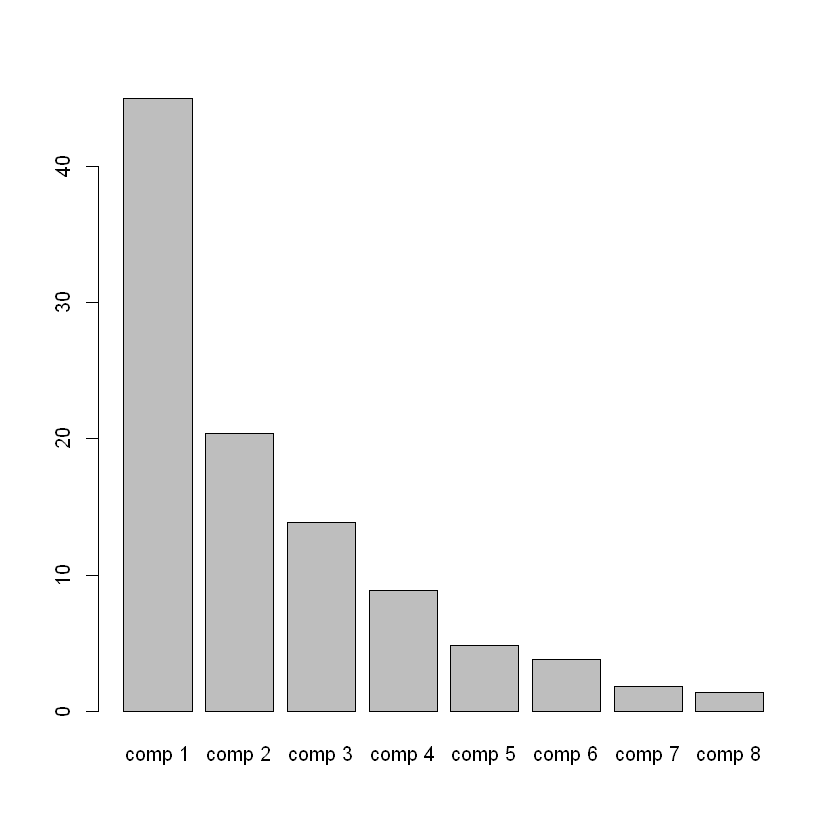

In [13]:
# we extract the first 2 columns
barplot(height = my_PCA$eig[,2])

<a id="5.2"></a>

### 2.1.2) Coordinates : `ind$coord` and `var$coord`

These are the coordinates of the individuals (or variables) in the new coordinate system defined by the principal axes. For individuals, we also refer to them as **scores.**

In [14]:
# information regarding individuals (print the first 4 rows)
my_PCA$ind$coord[1:4,]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Alabama,-3.8283643,-0.2371626,0.23164558,-0.3871601,-0.2500637
Alaska,1.0638275,5.5115692,4.28364318,-0.5815183,0.1102403
Arizona,-0.8762354,0.7526258,0.07805313,-1.7362938,-0.5654377
Arkansas,-2.4059587,-1.3014236,0.22505473,-0.6295345,0.6540497


In [15]:
# information regarding variables (print the first 4 rows)
my_PCA$var$coord[1:4,]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Population,-0.2398436,0.52487776,-0.69208615,0.34434757,0.251765858
Income,0.5669029,0.66297778,-0.10582738,0.07439531,-0.395428165
Illiteracy,-0.8872037,0.06766573,0.07476148,-0.29677518,0.002186803
Life Exp,0.7808560,-0.10431289,-0.37954435,-0.37225450,0.202555453


By default, when we perform PCA using the `PCA` function, the plots showing the coordinates of individuals and variables in the new coordinate system are produced. We can also generate them using the `plot` function as follows :

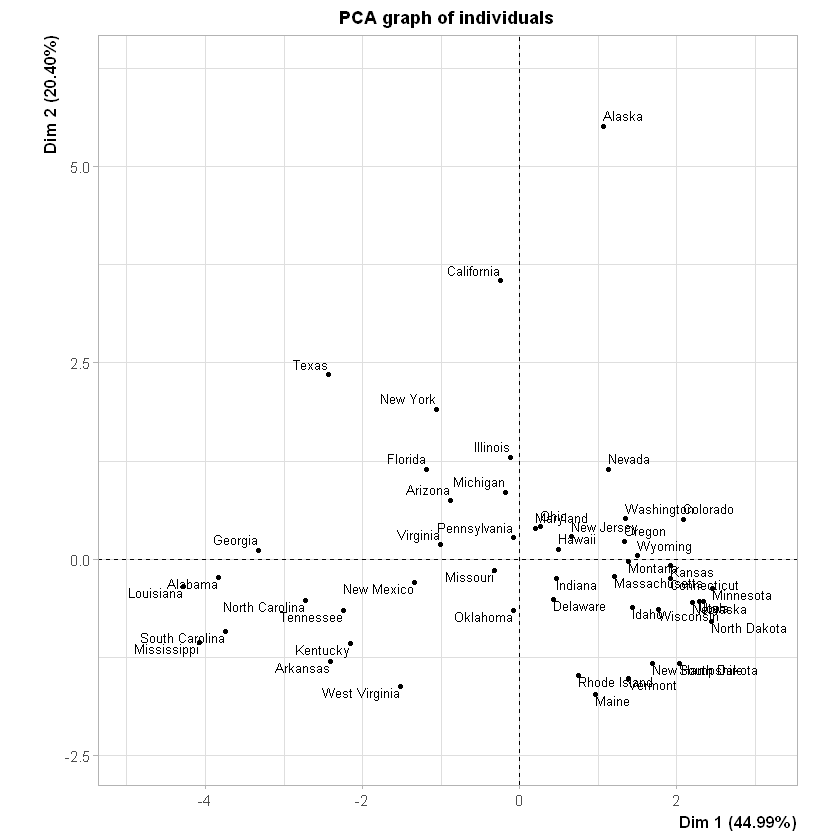

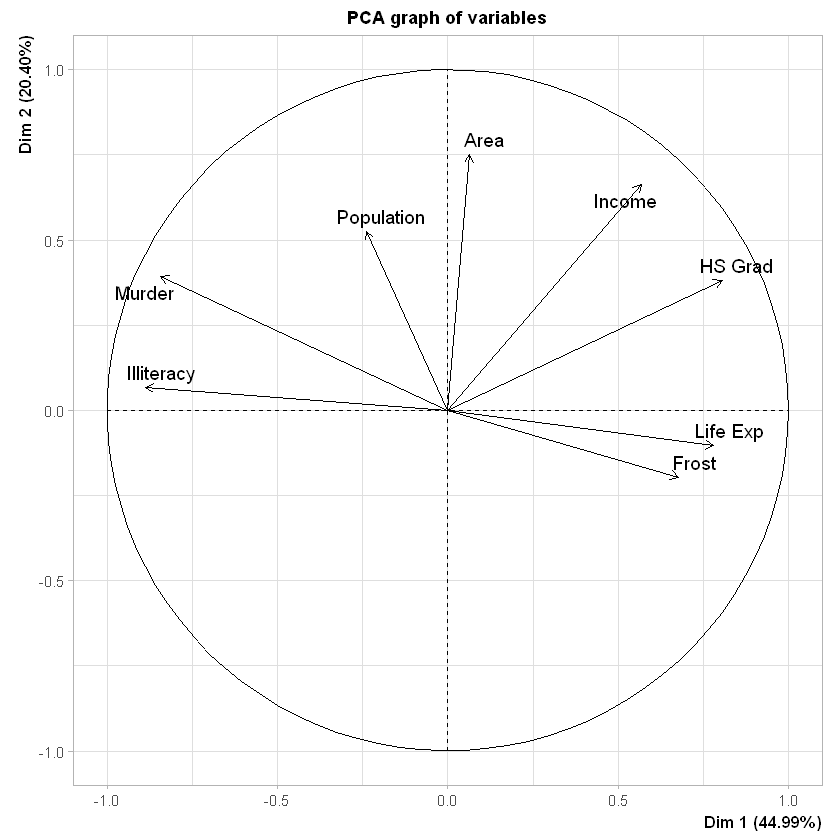

In [16]:
layout(matrix(1:2, nrow = 1))

plot(my_PCA, choix = "ind", cex = 0.7)  # 'ind' for the individuals
plot(my_PCA, choix = "var")            # 'var' for the variables

By default, the plots show the first factorial plane (i.e., the scores on the first two axes).

The first axis seems to be largely determined by the variables `Illiteracy`, `Murder`, `HS Grad`, `Life Exp`, and `Frost`, while the second axis appears to be related to the variables `Area` and `Population`.

* <u>**Interpretation**</u> **:** We can interpret two closely located variables (for example, `Murder` and `Illiteracy`) as being positively correlated a priori, while two opposite variables (for example, `Life Exp` and `Illiteracy`) are a priori negatively correlated.

In [17]:
cor(USA$Illiteracy, USA$Murder)
cor(USA$Illiteracy,USA$'Life Exp')

[1] 0.7029752

[1] -0.5884779

Conversely, two variables positioned approximately at right angles (for example, `Illiteracy` and `Area`) are a priori rather independent of each other :

In [18]:
cor(USA$Illiteracy, USA$Area)

[1] 0.07726113

In terms of scores, along axis 1, states like Georgia, Alabama, South Carolina, Louisiana, and Mississippi stand out. They are presumably characterized by high values of `Illiteracy` and `Murder` and low values of `HS Grad`, `Life Exp`, and `Frost`. Along axis 2, states like Alaska or California stand out. They are presumably characterized by high values of `Population` or `Area`.

Note that this representation on only two axes provides an approximate image of the dataset. For example, based on this representation, one might assume that Alaska has a high Population value, but this is not the case. Indeed, in the context of the dataset, there is indeed a correlation between `Population` and `Area`. However, while Alaska may have a high Area value, its population is actually very low.

<a id="5.3"></a>

### 2.1.3) Contributions `ind$contrib` and `var$contrib` and cosines `ind$cos2` and `var$cos2`

In addition to the coordinates of individuals and variables in the space defined by the factorial components, we often examine tables corresponding to :

* **Absolute contributions** (or simply "**contributions**") of variables and individuals to the axes. These values reflect the extent to which the direction of an axis is determined by an individual or a variable. It is the ratio between the inertia corresponding to the individual or the variable and the total inertia carried by the axis.

* **Relative contributions** (or **cosines$^2$**) of variables and individuals to the axes. These values reflect the quality of representation of the individual or the variable considered by the axis. These values are "visible" on the graph as corresponding to the square cosine of the angle formed between the vector connecting the origin to the point (representing the individual or the variable) and the axis in question.

Thus, in terms of contributions of variables to the axes :

In [19]:
# Contribution of the variables to PC1 and PC2 axis (the first 2 columns)
my_PCA$var$contrib[,1:2]

,Dim.1,Dim.2
Population,1.5984061,16.8817585
Income,8.9299316,26.9339033
Illiteracy,21.8714450,0.2805685
Life Exp,16.9423099,0.6667720
Murder,19.7364030,9.4217898
HS Grad,18.0356857,8.9261493
Frost,12.7743655,2.3588074
Area,0.1114532,34.5302512


It is mainly `Illiteracy`, `Murder`, `HS Grad`, and `Life Exp` that contribute to axis 1, and `Area`, `Population`, and `Income` that contribute to axis 2.

In terms of representation quality, the same variables stand out :

In [20]:
# Contribution of the variables to PC1 and PC2 axis (the first 2 columns)
my_PCA$var$cos2[,1:2]

,Dim.1,Dim.2
Population,0.057524967,0.275496661
Income,0.321378913,0.439539542
Illiteracy,0.787130472,0.004578651
Life Exp,0.609736046,0.010881180
Murder,0.710292537,0.153755998
HS Grad,0.649085498,0.145667546
Frost,0.459736076,0.038493831
Area,0.004011086,0.563505803


<a id="5.4"></a>

### 2.1.4) Supplementary variables

In addition to the variables that have an effect on the production of principal components and associated axes (**active variables**), we can add **supplementary variables** and, notably, make them visible on the graphs.

In factorial methods such as Principal Component Analysis (PCA), Correspondence Analysis (CA), and Multiple Correspondence Analysis (MCA), the concepts of <span style ="color:blue">**active variables**</span> and <span style ="color:blue">**supplementary variables**</span> play important roles in data analysis :

* <u>**Active Variables**</u> **:** are the variables that are directly involved in the analysis and contribute to the construction of factorial axes or components. In PCA, active variables are the variables used to compute the principal components. These variables define the structure of the data and are essential for understanding the underlying patterns and relationships. The active variables are typically scaled and centered before analysis to ensure their comparability and equal weighting in the analysis.

* <u>**Supplementary Variables**</u> **:** are additional variables that are not directly involved in the analysis but are projected onto the factorial axes or components to provide complementary information. These variables are often considered as auxiliary variables that can help interpret the results obtained from the active variables. In PCA, supplementary variables are projected onto the principal component space to visualize their relationships with the active variables and assess their contributions to the overall variability in the data.

Active variables are the primary variables of interest in factorial methods, while supplementary variables provide additional context and insights into the analysis. Both types of variables are important for a comprehensive understanding of the data structure and relationships captured by PCA, CA, and MCA.

Consider, for example, the region of the USA to which the different states belong :

In [21]:
levels(state.region)

[1] "Northeast"     "South"         "North Central" "West"

We add this variable to the dataset (to create the dataset `USAr`) and perform PCA on this dataset, specifying the column number where this additional variable (here, a qualitative variable) is located. Here, we will also treat the variables `Area` and `Population` as supplementary variables :

In [22]:
# create a new dataset by concatenating the new column named 'region' and the dataframe 'USA'
USAr <- data.frame(region = state.region, USA)
head(USAr)

,region,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,South,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,West,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,West,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,South,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,West,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,West,2541,4884,0.7,72.06,6.8,63.9,166,103766


In [23]:
# Columns
print(colnames(USAr))

[1] "region"     "Population" "Income"     "Illiteracy" "Life.Exp"  
[6] "Murder"     "HS.Grad"    "Frost"      "Area"      


In [24]:
my_PCA <- PCA(X = USAr,
              quali.sup = 1,         # USAr$Region (qualitative variable)
              quanti.sup = c(2,9),   # USAr$Population and USAr$Area (supplementary variables)
              graph = FALSE)

Then it is possible to display these variables on the graph showing the scores : 

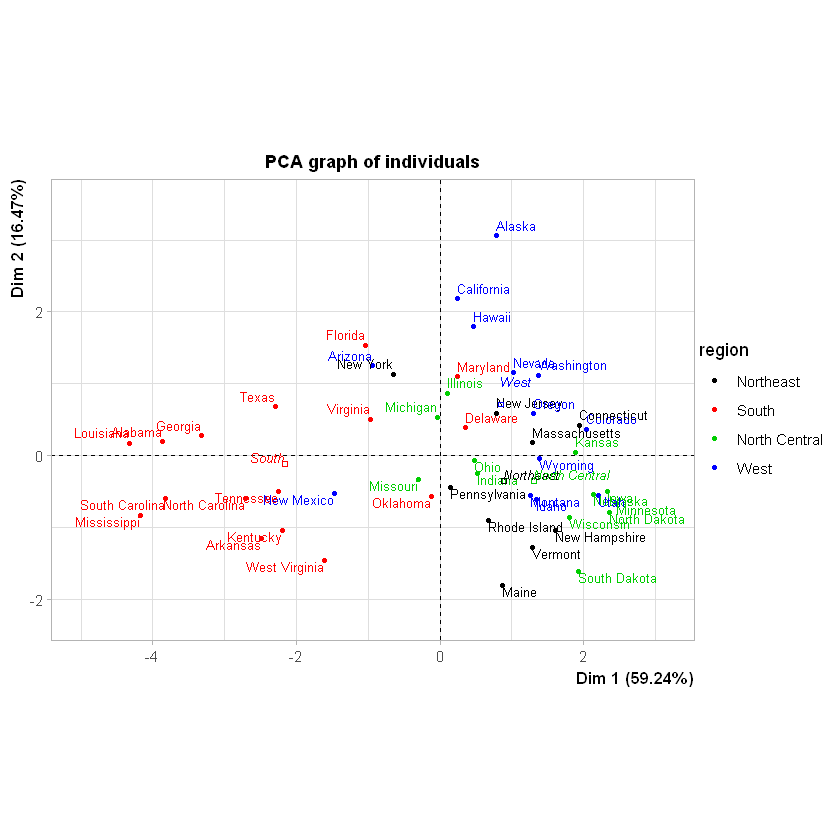

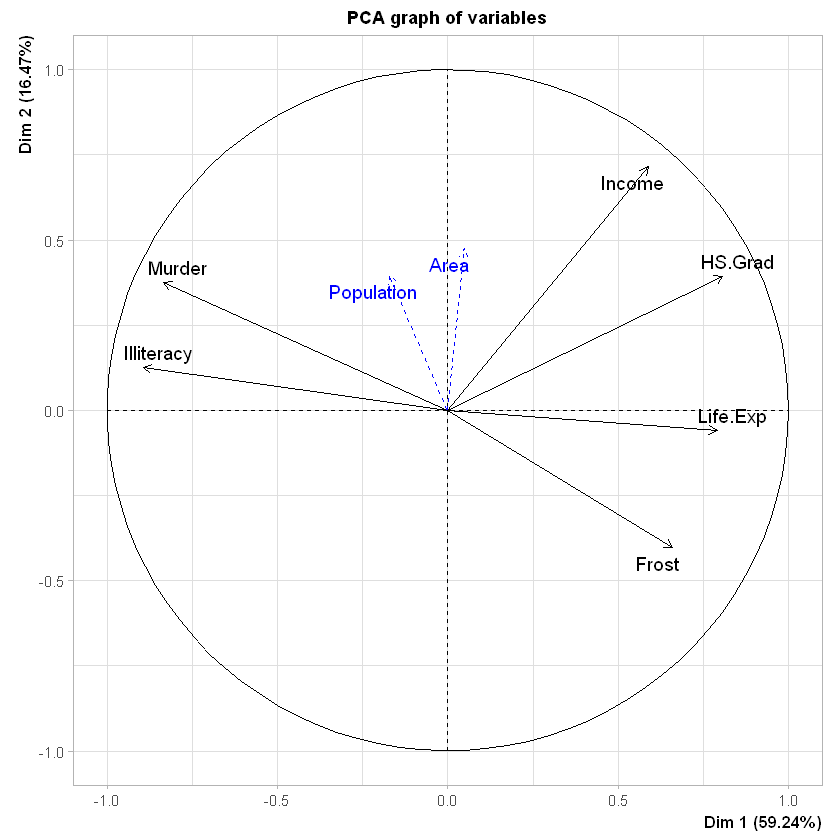

In [25]:
layout(matrix(1:2, nrow = 1))

plot(my_PCA, choix = "ind", cex = .7, habillage = "region") # 'ind' for the individuals
plot(my_PCA, choix = "var")           # 'var' for the variables

<a id="6"></a>

## 2.2) Examining PCA Results with the `explor` Package

While the few functions examined previously allow for graphically displaying the results of PCA, the produced graphs are not always aesthetic (at least in my personal opinion) nor very flexible (for example, regarding the appearance or positioning of labels).

The recently developed `explor` package addresses these shortcomings. Install it and try the following command :

In [26]:
#install.packages("explor")

#layout(matrix(1:2, nrow = 1))
#require("explor")  # charging 
#explor(my_PCA)

Perform PCA on the dataset 'notes'. Describe the results :

* Have we succeeded in describing the dataset well through the results of PCA?
* Which variables have the most influence in defining the principal components?
* How are the variables inter-correlated?

<u>**Note**</u> **:**

In the `FactoMineR` package, analyses are conducted, by default, on "standardized" variables, i.e. transformed so that all variables have the same variance. This operation aims to give the same weight (in terms of inertia) to different variables.

Indeed, if a variable naturally takes stronger or "more variable" values than others, it will tend to have a greater impact on the results of the analyses. For example, in the `USA` dataset, the variable `Area` takes particularly large values : if we do not center and scale the dataset, this variable will have a huge weight in the results of the analysis.

You can convince yourself by executing the following command :

In [27]:
PCA(USA, scale.unit = FALSE)

Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 50 individuals, described by 8 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error of

In [28]:
PCA(USA, scale.unit = FALSE)$var$contrib[, 1:2]

Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


,Dim.1,Dim.2
Population,1.399410e-04,9.992011e+01
Income,6.846335e-04,7.822461e-02
Illiteracy,3.045875e-11,2.017864e-08
Life Exp,2.851104e-10,3.718698e-08
Murder,9.764447e-09,7.768082e-06
HS Grad,9.968469e-08,3.543977e-06
Frost,1.301163e-07,1.498952e-03
Area,9.999918e+01,1.576375e-04


In [29]:
my_PCA$var$contrib[,1:2]  # scale.unit is by default 'TRUE'

,Dim.1,Dim.2
Income,9.724705,51.691438
Illiteracy,22.481325,1.581765
Life.Exp,17.606990,0.360800
Murder,19.585528,14.178381
HS.Grad,18.332955,15.683639
Frost,12.268498,16.503977


<a id="7"></a>

# 3 - Fundamentals of variables and scales in Data Analysis

In this chapter, we'll delve into the fundamental concepts that establish the measurement and categorization of data in various fields, from statistics to machine learning. Understanding variables and scales is essential for anyone working with data, as they form the backbone of data analysis and interpretation.

We'll begin by exploring the distinction between <span style="color:blue">**qualitative**</span> and <span style="color:blue">**quantitative**</span> variables, discussing their characteristics and how they are represented in datasets. From there, we'll delve into different measurement scales, such as <span style="color:green">**nominal**</span>, <span style="color:green">**ordinal**</span>, <span style="color:green">**interval**</span>, and <span style="color:green">**ratio**</span> scales, each with its unique properties and applications.

* <u>**Qualitative Variable**</u> **:** also known as **categorical variables**, are variables that represent categories or groups and cannot be measured numerically. They describe qualities or characteristics that are not inherently numerical.

    * **Example :** Gender (categories: male, female), Marital Status (categories: married, single, divorced), Color (categories: red, blue, green).
    
* <u>**Quantitative Variable**</u> **:** also known as **numerical variables**, are variables that represent measurable quantities and can be expressed with numerical values. They can be <span style="color:blue">**discrete**</span> or <span style="color:blue">**continuous**</span>.

    * **Example :** Age (measured in years), Income (measured in dollars), Temperature (measured in degrees Celsius).
    
    * <u><span style="color:blue">**Discrete Variable**</span></u> **:** are quantitative variables that take on a finite or countable number of distinct values. There are gaps between possible values, and they are often integers.
    
    * **Example :** Number of children in a family, Number of students in a class, Number of cars in a parking lot.
    
    * <u><span style="color:blue">**Continuous Variable**</span></u> **:** are quantitative variables that can take on an infinite number of values within a specified range. They can take any value within a range and are often measured using real numbers.
    
    * **Example :** Height (measured in centimeters), Weight (measured in kilograms), Time (measured in seconds).
    
* <u>**Independent Variable**</u> **:** is a variable that is manipulated or controlled by the researcher in an experiment or study. It is the variable that is hypothesized to cause or influence changes in the dependent variable.

    * **Example :** In a study investigating the effect of different study techniques on exam scores, the study technique (e.g., reading, highlighting, summarizing) would be the independent variable.
    
* <u>**Dependent Variable**</u> **:** is a variable that is measured or observed in an experiment or study. It is the variable that is expected to change as a result of variations in the independent variable.

    * **Example :** In the same study mentioned earlier, the exam score would be the dependent variable, as it is expected to vary depending on the study technique used (independent variable).
    
* <u>**Nominal Scale**</u> **:** is a scale of measurement that categorizes data into distinct categories or groups with no inherent order or ranking. The categories are mutually exclusive and exhaustive.

    * **Example :** Types of fruit (apple, banana, orange), Blood type (A, B, AB, O), Marital status (married, single, divorced).
    
* <u>**Ordinal Scale**</u> **:** is a scale of measurement that categorizes data into ordered or ranked categories where the relative position or order of categories is meaningful, but the exact differences between categories are not specified.

    * **Example :** Ranking of satisfaction levels (very dissatisfied, dissatisfied, neutral, satisfied, very satisfied), Educational attainment level (elementary, high school, bachelor's degree, master's degree, PhD).


<a id="8"></a>

# 4 - Other examples of factorial methods: CA and MCA

<a id="9"></a>

## 4.1) A dataset comprising two qualitative variables : CA

**Correspondence Analysis (CA)** is based on similar principles to PCA. It is applied when considering two <span style="color:blue">**qualitative variables**</span>. For instance, one could consider data classifying bank clients according to their socio-professional category (SPC) and their age :

In [30]:
#install.packages("ade4")

In [31]:
library(ade4)
data(banque)
data <- banque


Attaching package: 'ade4'


The following object is masked from 'package:FactoMineR':

    reconst




In [32]:
# dataframe
head(data)

,csp,duree,oppo,age,sexe,interdit,cableue,assurvi,soldevu,eparlog,⋯,credhab,credcon,versesp,retresp,remiche,preltre,prelfin,viredeb,virecre,porttit
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,ouvri,d48,non,ai75,hom,non,non,non,n1,nul,⋯,non,nul,non,fai,nul,nul,nul,nul,nul,nul
2,cadsu,d24,non,ai35,hom,non,non,non,n1,nul,⋯,non,nul,non,fai,nul,nul,nul,nul,nul,nul
3,cadsu,d48,non,ai75,hom,non,non,non,p1,nul,⋯,non,nul,non,fai,nul,nul,nul,nul,nul,nul
4,inact,d24,non,ai45,fem,oui,non,non,p2,nul,⋯,non,nul,oui,fai,fai,nul,nul,nul,nul,moy
5,retra,d812,non,ai75,hom,non,non,non,p4,nul,⋯,non,nul,non,fai,nul,nul,nul,fai,nul,for
6,inact,dp12,non,ai45,fem,non,non,non,p1,nul,⋯,non,nul,non,fai,nul,nul,nul,nul,nul,nul


To understand this type of data, we first look at the contingency table, which provides the observed frequencies by crossing the two factors :

In [33]:
observed_freq <- round(table(data$age, data$csp)*100/sum(table(data$age, data$csp)), 1)

# Create a table of observed frequencies with row and column sums
observed_freq_with_margins <- addmargins(observed_freq, FUN = list(column_sum= sum, line_sum = sum))

# Print the table with row and column sums and custom names
print(observed_freq_with_margins)

Margins computed over dimensions
in the following order:
1: 
2: 
            
             agric artis cadsu inter emplo ouvri retra inact etudi line_sum
  ai25         0.0   0.1   0.1   0.0   1.6   1.5   0.0   1.5   6.3     11.1
  ai35         0.5   0.4   1.4   3.0   4.4   8.1   0.0   0.9   0.6     19.3
  ai45         1.5   1.6   5.1   3.7   4.8   6.5   0.1   2.7   0.1     26.1
  ai55         1.0   2.1   3.1   4.2   4.8   4.2   0.1   2.0   0.0     21.5
  ai75         0.6   1.7   3.1   1.7   3.0   2.2   6.2   3.5   0.0     22.0
  column_sum   3.6   5.9  12.8  12.6  18.6  22.5   6.4  10.6   7.0    100.0


At this stage, we have 'transformed' our table of qualitative variables into a table comprising numbers.

We cannot directly interpret this table to deduce the strength of the link between two factor modalities. Indeed, a high value in the table may simply be explained by high marginal values (for example, the proportion of workers aged under 45 is quite high not because there is a link between these two modalities, but because the marginal proportions of people aged under 45 and the proportion of workers are high: $ai45*ouvri=0.261*0.225\approx0.059$

Therefore, it is useful to quantify the influence of marginal proportions on the observed proportions. This amounts to quantifying the values we would theoretically observe if the two factors, `csp` and `age`, were completely independent.

The frequencies in each cell would be equal to the multiplication of the marginal frequencies. For example, the percentage of farmers aged under 25 (`ai25`,`agric`) would be equal to the overall percentage of farmers (2.9%) multiplied by the overall percentage of people aged under 25 : $0.036*0.111= 0.003996 \approx 0.4\%$

In [34]:
# Get the number of rows and columns in the table
num_rows <- nrow(observed_freq)
num_cols <- ncol(observed_freq)

# For that, we perform an exterior product between 'line_sum' and 'column_sum'
observed_freq <- round(outer(observed_freq_with_margins[,10], observed_freq_with_margins[6,])/100, 1)[1:num_rows-1, 1:num_cols-1]
observed_freq

,agric,artis,cadsu,inter,emplo,ouvri,retra,inact
ai25,0.4,0.7,1.4,1.4,2.1,2.5,0.7,1.2
ai35,0.7,1.1,2.5,2.4,3.6,4.3,1.2,2.0
ai45,0.9,1.5,3.3,3.3,4.9,5.9,1.7,2.8
ai55,0.8,1.3,2.8,2.7,4.0,4.8,1.4,2.3


In [35]:
outer(table(data$csp),observed_freq)


, ,  = agric

       
        ai25  ai35  ai45  ai55
  agric 11.6  20.3  26.1  23.2
  artis 19.2  33.6  43.2  38.4
  cadsu 41.2  72.1  92.7  82.4
  inter 40.8  71.4  91.8  81.6
  emplo 60.4 105.7 135.9 120.8
  ouvri 73.2 128.1 164.7 146.4
  retra 20.8  36.4  46.8  41.6
  inact 34.0  59.5  76.5  68.0
  etudi 22.8  39.9  51.3  45.6

, ,  = artis

       
         ai25  ai35  ai45  ai55
  agric  20.3  31.9  43.5  37.7
  artis  33.6  52.8  72.0  62.4
  cadsu  72.1 113.3 154.5 133.9
  inter  71.4 112.2 153.0 132.6
  emplo 105.7 166.1 226.5 196.3
  ouvri 128.1 201.3 274.5 237.9
  retra  36.4  57.2  78.0  67.6
  inact  59.5  93.5 127.5 110.5
  etudi  39.9  62.7  85.5  74.1

, ,  = cadsu

       
         ai25  ai35  ai45  ai55
  agric  40.6  72.5  95.7  81.2
  artis  67.2 120.0 158.4 134.4
  cadsu 144.2 257.5 339.9 288.4
  inter 142.8 255.0 336.6 285.6
  emplo 211.4 377.5 498.3 422.8
  ouvri 256.2 457.5 603.9 512.4
  retra  72.8 130.0 171.6 145.6
  inact 119.0 212.5 280.5 238.0
  etudi  79.8 142.5 188.1 159.6

, ,  = inter

       
         ai25  ai35  ai45  ai55
  agric  40.6  69.6  95.7  78.3
  artis  67.2 115.2 158.4 129.6
  cadsu 144.2 247.2 339.9 278.1
  inter 142.8 244.8 336.6 275.4
  emplo 211.4 362.4 498.3 407.7
  ouvri 256.2 439.2 603.9 494.1
  retra  72.8 124.8 171.6 140.4
  inact 119.0 204.0 280.5 229.5
  etudi  79.8 136.8 188.1 153.9

, ,  = emplo

       
         ai25  ai35  ai45 ai55
  agric  60.9 104.4 142.1  116
  artis 100.8 172.8 235.2  192
  cadsu 216.3 370.8 504.7  412
  inter 214.2 367.2 499.8  408
  emplo 317.1 543.6 739.9  604
  ouvri 384.3 658.8 896.7  732
  retra 109.2 187.2 254.8  208
  inact 178.5 306.0 416.5  340
  etudi 119.7 205.2 279.3  228

, ,  = ouvri

       
         ai25  ai35   ai45  ai55
  agric  72.5 124.7  171.1 139.2
  artis 120.0 206.4  283.2 230.4
  cadsu 257.5 442.9  607.7 494.4
  inter 255.0 438.6  601.8 489.6
  emplo 377.5 649.3  890.9 724.8
  ouvri 457.5 786.9 1079.7 878.4
  retra 130.0 223.6  306.8 249.6
  inact 212.5 365.5  501.5 408.0
  etudi 142.5 245.1  336.3 273.6

, ,  = retra

       
         ai25  ai35  ai45  ai55
  agric  20.3  34.8  49.3  40.6
  artis  33.6  57.6  81.6  67.2
  cadsu  72.1 123.6 175.1 144.2
  inter  71.4 122.4 173.4 142.8
  emplo 105.7 181.2 256.7 211.4
  ouvri 128.1 219.6 311.1 256.2
  retra  36.4  62.4  88.4  72.8
  inact  59.5 102.0 144.5 119.0
  etudi  39.9  68.4  96.9  79.8

, ,  = inact

       
         ai25 ai35  ai45  ai55
  agric  34.8   58  81.2  66.7
  artis  57.6   96 134.4 110.4
  cadsu 123.6  206 288.4 236.9
  inter 122.4  204 285.6 234.6
  emplo 181.2  302 422.8 347.3
  ouvri 219.6  366 512.4 420.9
  retra  62.4  104 145.6 119.6
  inact 102.0  170 238.0 195.5
  etudi  68.4  114 159.6 131.1

Or, in terms of frequencies :

In [36]:
table(data$csp)


agric artis cadsu inter emplo ouvri retra inact etudi 
   29    48   103   102   151   183    52    85    57 

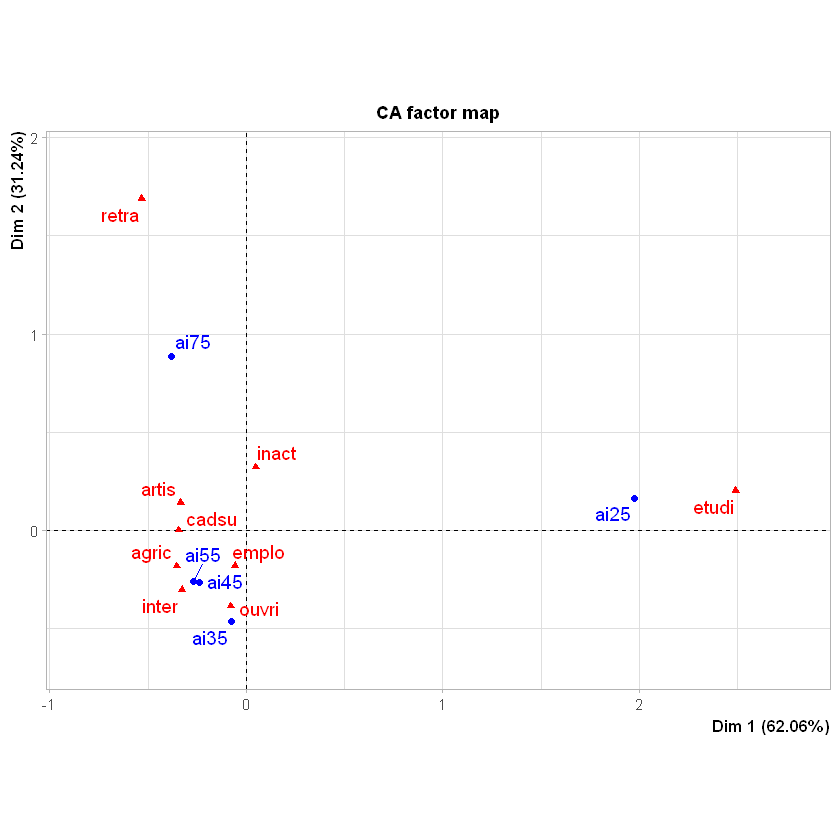

In [37]:
contingency_table = table(data$age,data$csp)
my_CA=CA(contingency_table)

<u>**Note**</u> **:** You can also use the explor package here

<a id="10"></a>

## 4.2) Numerous qualitative variables: MCA (Multiple Correspondence Analysis)

We can generalize the principle of **CA** to more than two factors by performing **MCA.** To do this, we (or rather, the **MCA** function) rely on a disjunctive table that <span style="color:blue">**splits**</span> the qualitative variables into as many binary variables.

In [38]:
table = data.frame(var=c("yoopi","boom","clop","clop","boing","boing","boom","yoopi"))
table

var
<chr>
yoopi
boom
clop
clop
boing
boing
boom
yoopi


In [39]:
# the disjunctive table splits the qualitative variables into as many binary variables
tab.disjonctif(table)

,boing,boom,clop,yoopi
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,1,0,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,0,1


In [40]:
data(tea)

The dataset `tea` comprises questions related to the times when tea is consumed (for example, 'Do you drink tea at breakfast?', Yes or no response) :

* **breakfast**
* **tea.time**
* **evening**
* **lunch**
* **dinner**
* **always**

It includes questions about the places where tea is consumed (for example, 'Do you drink tea at home?', Yes or no response) :

* **home**
* **work**
* **tearoom**
* **friends**
* **resto**
* **pub**

It contains questions about the type of tea consumed and the mode of consumption :

* **Tea :** What kind of tea do you drink the most (black tea, green tea, flavored tea)?
* **How :** How do you take your tea (nothing added, with lemon, with milk, other)?
* **sugar :** Do you add sugar to your tea (yes, no)?
* **how :** What kind of tea do you buy (tea bags, loose tea, both)?
* **where :** Where do you buy your tea (in the supermarket, in specialist shops, both)?
* **price :** What kind of tea do you buy (cheapest, supermarket brand, well-known brand, luxury, it varies, I don’t know)?

It includes questions about the characteristics and lifestyles of the respondents :

* **age :** Age (quantitative)
* **sex :** Female or male (F, M)?
* **SPC :** Socio-professional category (employee, middle, non-worker, other, worker, senior, student, workman)
* **Sport :** regular practice of sports (sportsman, age_Q: age category (15-24, 25-34, 35,44, 45-59, +60) Not.sportsman)?
* **frequency :** How often do you drink tea (more than twice a day, once a day, 3 to 6 times a week, once or twice per week) ?

Finally, it includes a series of questions related to the image of tea for the respondents:

* **escape.exoticism :** Do you consider tea to be exotic (yes, no)?
* **spirituality :** Do you associate tea with spirituality (yes, no)?
* **healthy :** Is tea good for your health (yes, no)?
* **diuretic :** Is tea a diuretic (ie. medicine that help reduce fluid buildup in the body) (yes, no)?
* **friendliness :** Do you associate tea with friendliness (yes, no)?
* **iron.absorption :** Does tea stop the body from absorbing iron (yes, no)?
* **feminine :** Is tea feminine (yes, no)?
* **sophisticated :** Is tea refined (yes, no)?
* **slimming :** Will tea help you to lose weight (yes, no)?
* **exciting :** Is tea a stimulant (yes, no)?
* **relaxing :** Is tea a relaxant (yes, no)?
* **effect.on.health :** Does tea have any effect on your overall health (yes, no)?

This dataset contains many variables! Here, we will perform an **MCA considering the first 18 variables** of the dataset as <span style="color:blue">**active variables**</span> and the last 18 as <span style="color:blue">**supplementary variables**</span>.

This dataset indeed contains a lot of variables! Here, we will perform an MCA considering the first $18$ variables of the dataset as active variables and the last 18 as supplementary variables.

In [41]:
my_MCA <- MCA(tea, quanti.sup = 19, quali.sup = 20:36, graph = FALSE)

Here, obviously, the proportion of inertia that we are able to explain is low because there are many variables to consider.

In [42]:
print(dim(my_MCA$eig))
head(my_MCA$eig)

[1] 27  3


,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.14827441,9.884961,9.884961
dim 2,0.12154673,8.103115,17.988076
dim 3,0.09000954,6.000636,23.988712
dim 4,0.07805440,5.203627,29.192339
dim 5,0.07374870,4.916580,34.108919
dim 6,0.07138044,4.758696,38.867615


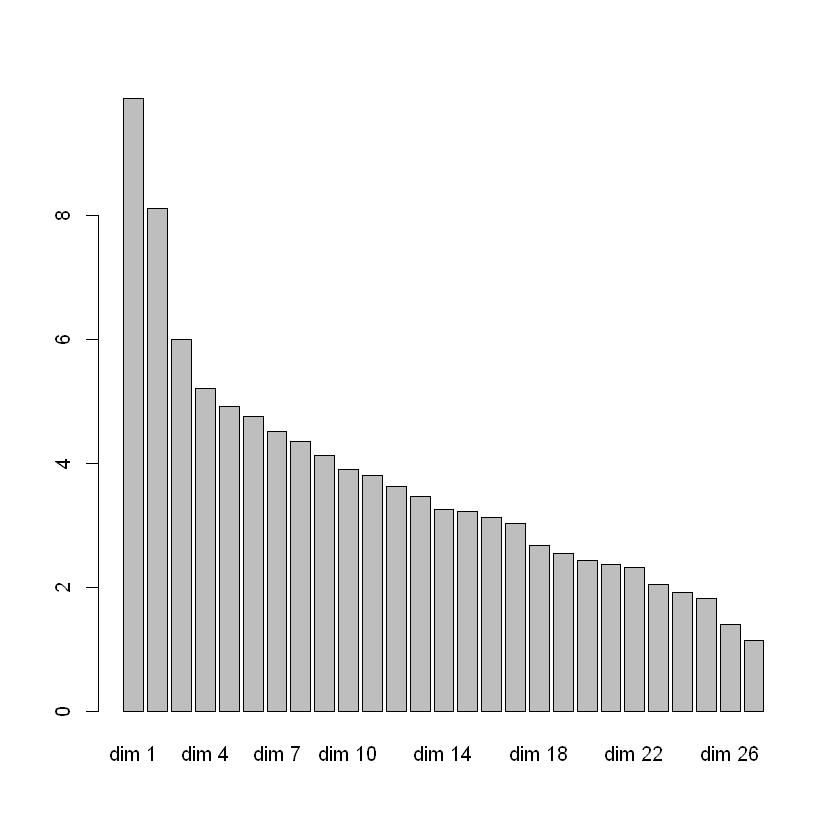

In [43]:
barplot(my_MCA$eig[,2])

In [44]:
# cumulative percentage of variance with 2 components
sum(my_MCA$eig[2, 3])

[1] 17.98808

Considering $2$ axes instead of the $27$ original dimensions, we still manage to represent approximately $17\%$ of the total inertia (which is not bad considering that $2/27=7.4\%$).

Notice that we have $27$ dimensions for $18$ questions. Indeed, a question with $k$ modalities corresponds to $k-1$ dimensions.

Obviously, with such a number of original dimensions, we obtain somewhat cluttered graphs, and it can be interesting to customize the plot function a bit :

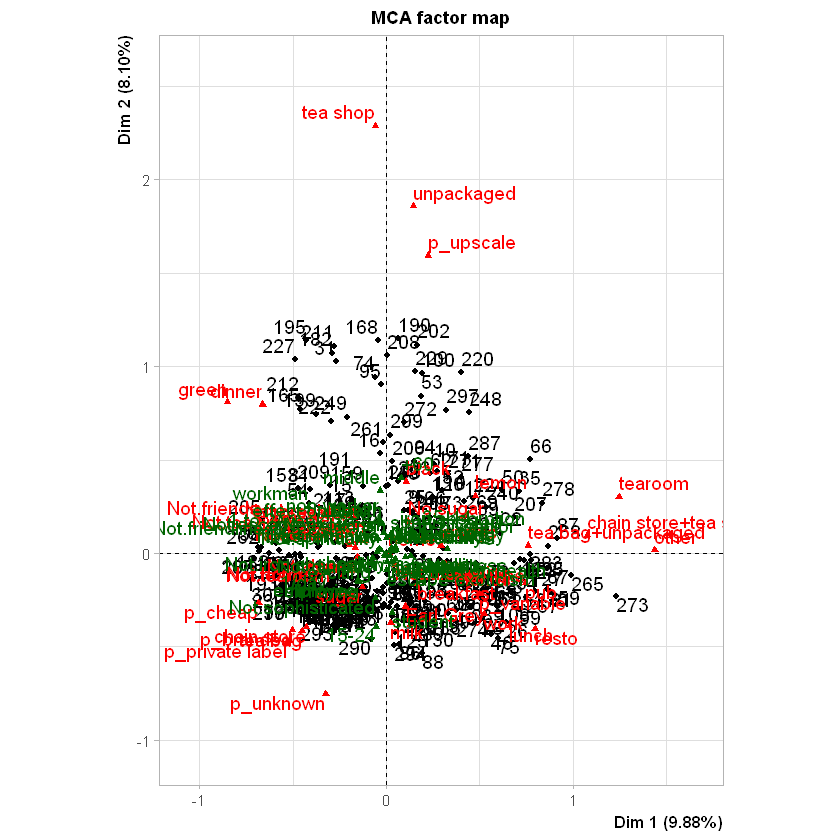

Warning message:
"ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


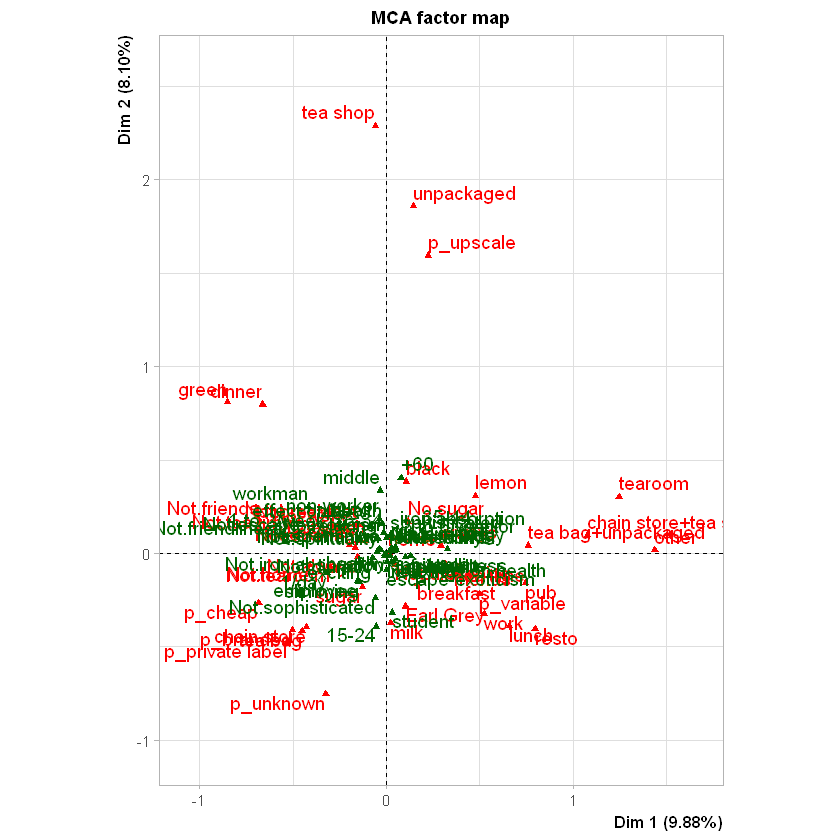

Warning message:
"ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


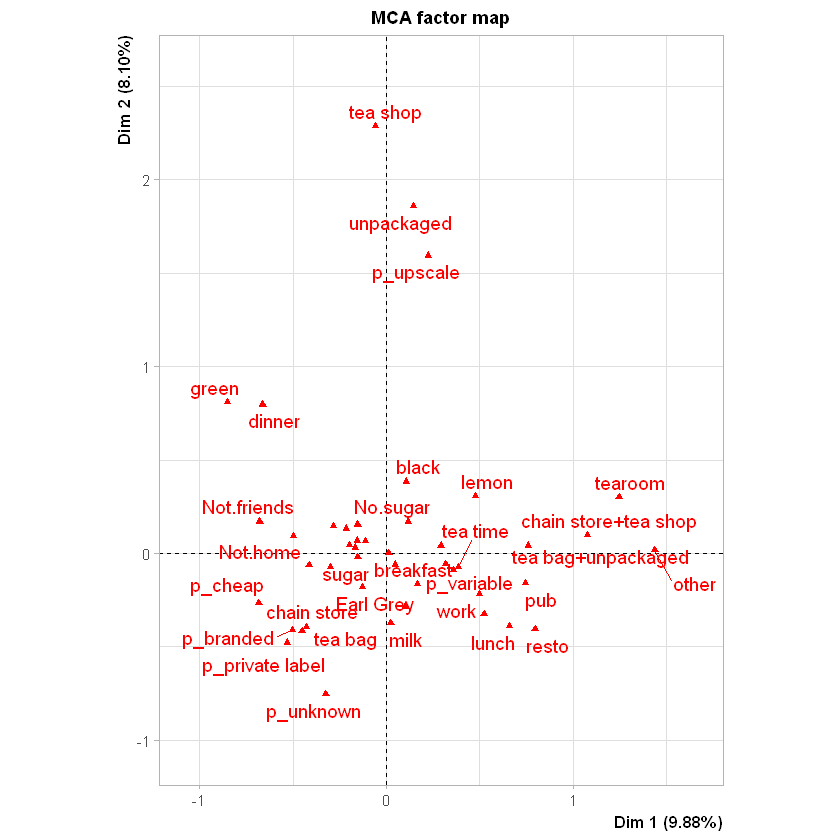

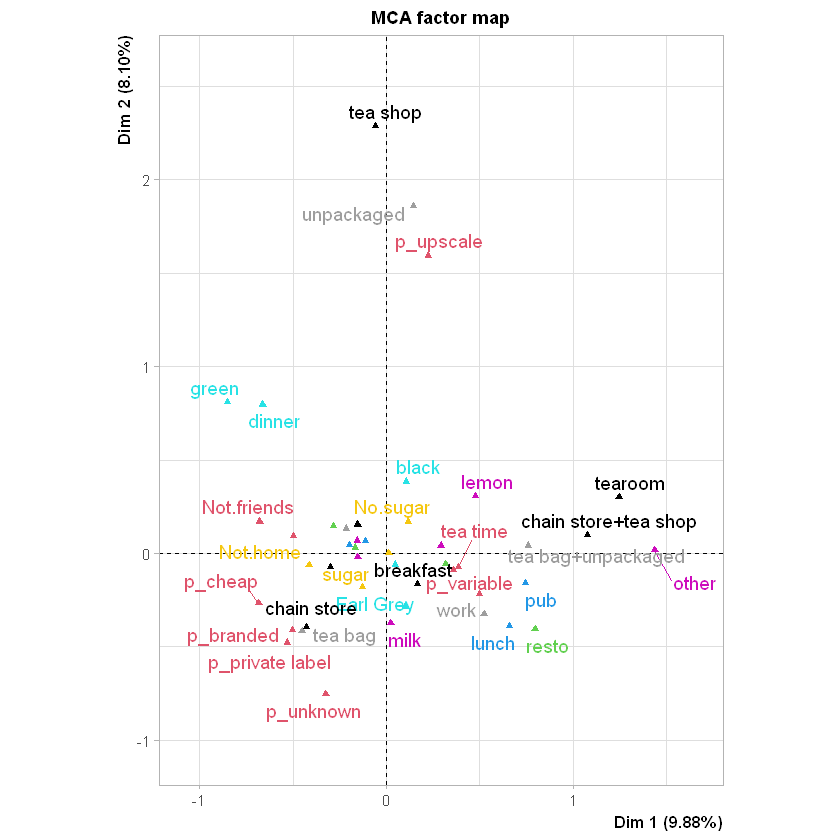

In [45]:
layout(matrix(1:4, nrow = 2))

plot(my_MCA)
plot(my_MCA, invisible = "ind")
plot(my_MCA, invisible = c("ind", "quali.sup"))
plot(my_MCA, invisible = c("ind", "quali.sup"), hab = "quali")

Of course, it's also particularly interesting here to use the `explor` package because we more than ever need flexible and interactive graphical outputs :

In [46]:
require(explor)

Loading required package: explor



In [47]:
#explor(my_MCA)

<a id="11"></a>

# 5 - Defining classes from (numerous) variables: Hierarchical Cluster Analysis (HCA)

<a id="12"></a>

## 5.1) Principle

Factorial methods such as PCA allow us to 'represent' a dataset in space. To understand the structure of a dataset, it may be tempting to use these space representations to define classes : this is where **Hierarchical Cluster Analysis (HCA)** comes into play.

**HCA** involves constructing a classification tree. The figure below illustrates how HCA relies on distances between points, and then between clusters, to propose a classification.


<img src="HCA.png" alt="PCA1" style="width:700px;height:800px;">

 <figcaption><center>Algorithm for constructing a classification tree: Ward's method, Euclidean distance (the numbers inside the tables represent the distances between different points)</center></figcaption>

The barycenter $G$ of $\bigl\{(A,a), (B,b)\bigr\}$ is such as : $\vec{OG} = \frac{a}{a+b}\vec{OA} +\frac{b}{a+b}\vec{OB}$

<a id="13"></a>

## 5.2) Implementation: `HCPC` function

Here, let's take the data from the `USA` table again and perform PCA once more, specifying the number of principal components to retain. We can then perform hierarchical clustering of the different states and display the result very simply using the `HCPC` function :

In [48]:
?PCA

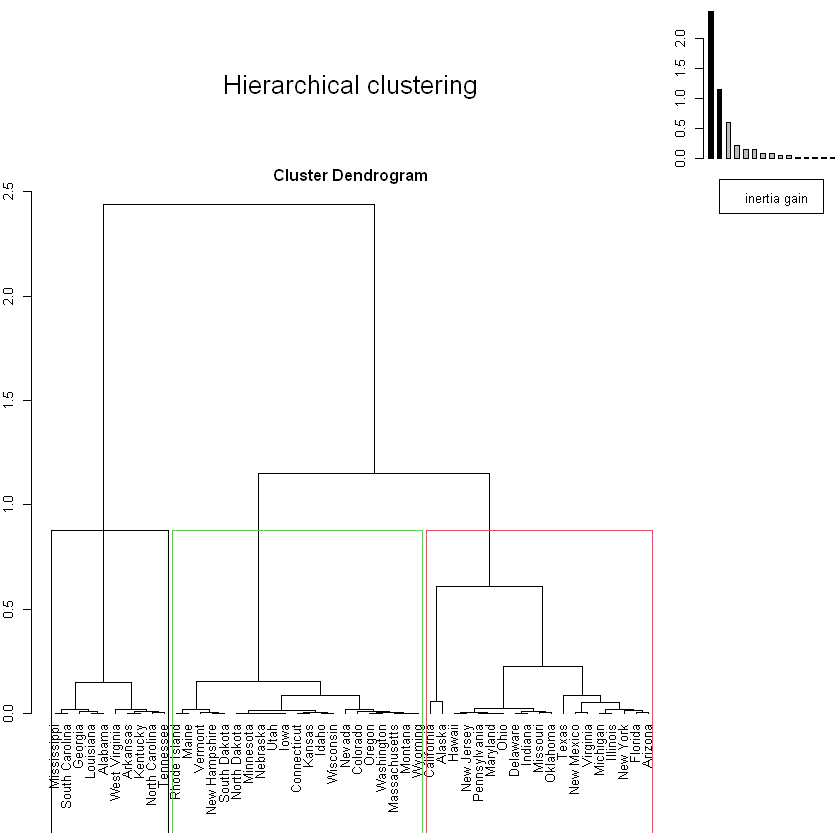

In [49]:
my_PCA <- PCA(USA, ncp = 2, graph = FALSE)
my_HCPC <- HCPC(my_PCA, nb.clust = 3, graph = FALSE)

plot(my_HCPC, choice = "tree")

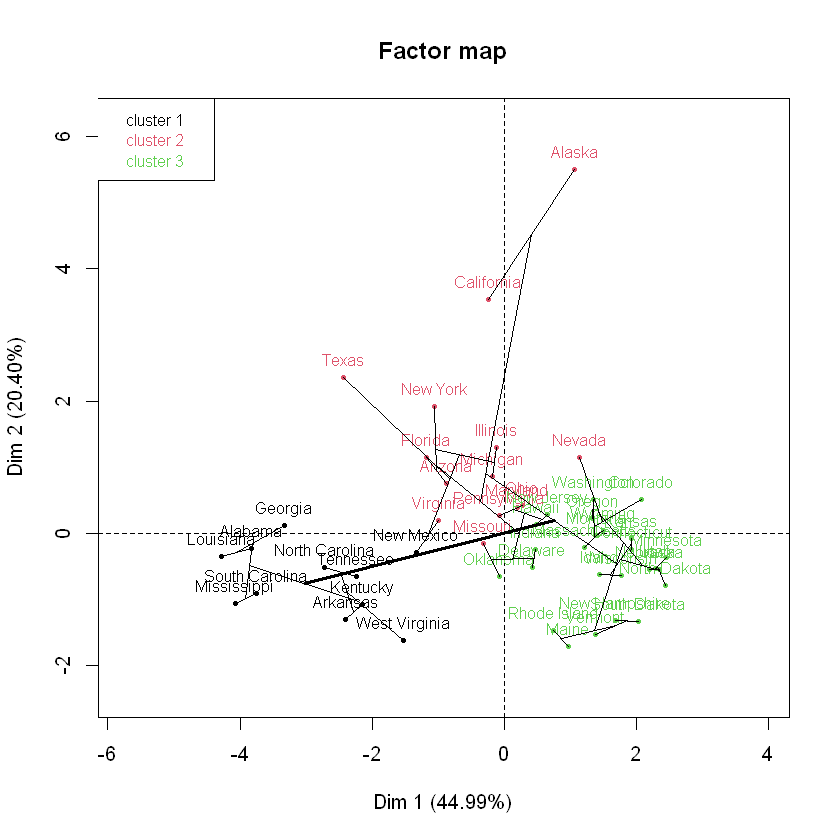

In [50]:
plot(my_HCPC, choice = "map")

Important document (in French) :

* [Statistique Multidimensionnelle](https://www.math.univ-toulouse.fr/~sdejean/PDF/stat_multidim_sdejean.pdf)

# Log Change 

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description |
| ----------------- | ------- | -------------   | ----------------------- |
| 2023-06-20       | 1.0     | Younes Dahami   |   initial version |
| 2024-05-13       | 1.1     | Younes Dahami   |  adding a table of contents |